In [1]:
# %%bash
# pip install deepsurvk

In [1]:
import os
import deepsurvk
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, TerminateOnNaN

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, Normalizer

os.chdir("../")
from scr.utils import *
from scr.runDeepSurvModels import *

2024-10-31 10:17:59.303344: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nfs/dengy/local/lib:/home/nfs/dengy/local/lib:/home/nfs/dengy/local/lib:
2024-10-31 10:17:59.303384: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Training Models: Default parameters
- Default parameters:
    -    'learning_rate`: 1e-4
    -  'decay': 1e-4
    - 'momentum': 0.5
    - 'L2_reg': 10.0
    - 'dropout': 0.2
    - 'standardize': True

In [ ]:
subset = [50,  200, 500, 1000, 2000, 5000, 8000]
epochs = [ 500, 500, 500, 1000, 2000, 2000, 2000]

hyperparams = {
    'learning_rate': 1e-4,
    'decay': 1e-4,
    'momentum': 0.5,
    'L2_reg': 10.0,
    'batch_size': 64,
    # 'batch_norm': True,
    'dropout': 0.2,
    'standardize': True
}

## Linear

### Moderate Signals

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri


Event rate in train set: 0.745250
Event rate in test set: 0.745500
Survival time distribution:


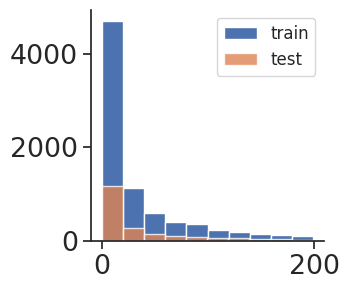

In [3]:
# prepare data
folder = 'linear'
keywords = ['moderate', "latest", 'RW']
DATANAME = 'linear-modereate'
train_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords)

X_train, Y_train, E_train, = dataframe_to_deepsurv_ds(train_df, is_deepsurvk=True)
X_test, Y_test, E_test = dataframe_to_deepsurv_ds(test_df, is_deepsurvk=True)

print("Event rate in train set: %f" % (sum(E_train==1) / len(E_train)))
print("Event rate in test set: %f" %  (sum(E_test==1)  / len(E_test)))
print('Survival time distribution:')
_, ax = plt.subplots(figsize=(3,3))
ax.hist(train_df['time'], label='train')
ax.hist(test_df['time'], label='test', alpha=0.8)
ax.legend(fontsize=12)
plt.show()

In [6]:
# train DeepSurvK model
dsk = DeepSurvKModel(subset, epochs, train_df, test_df, dataName=DATANAME)
dsk.build_model()
history_dict, dsk_dict, dsk_results = dsk.run_deepsurvModel(
    params=hyperparams,  patience=25,
    tensorboard=False, save_model = False, 
    # early_stopping=False
)
dsk_results

2024-10-30 14:43:50.226600: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nfs/dengy/local/lib:/home/nfs/dengy/local/lib:/home/nfs/dengy/local/lib:
2024-10-30 14:43:50.226635: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-10-30 14:43:50.226664: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2024-10-30 14:43:50.226932: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
1/1 [==============================] - 1s 795ms/step - loss: 5515.8267
Epoch 2/500
1/1 [==============================] - 0s 14ms/step - loss: 5510.9043
Epoch 3/500
1/1 [==============================] - 0s 13ms/step - loss: 5525.7861
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 5518.0410
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 5525.7593
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 5524.3374
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 5531.9077
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 5521.7007
Epoch 9/500
1/1 [==============================] - 0s 55ms/step - loss: 5520.4883
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 5507.6743
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 5516.0557
Epoch 12/500
1/1 [==============================] - 0s 12ms/step - loss: 5512.8877
Epoch 13/500

,n train,train time,train score,test score
0,50,3.34,0.720037,0.647067
1,200,3.23,0.655371,0.664085
2,500,5.94,0.736947,0.713668
3,1000,29.19,0.732986,0.705739
4,2000,61.65,0.716461,0.700511
5,5000,82.59,0.786801,0.780991
6,8000,205.59,0.827224,0.816677


In [7]:
# dsk_results
dsk.write(dsk_results, fileName='model.results.1030.txt')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri


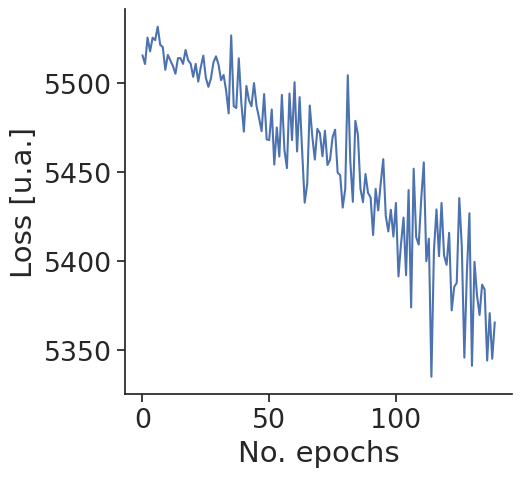

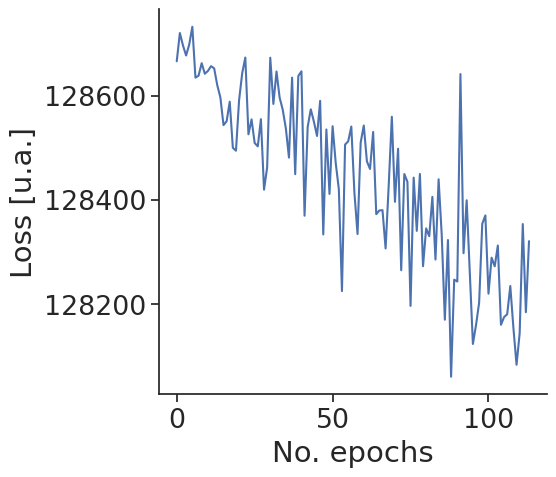

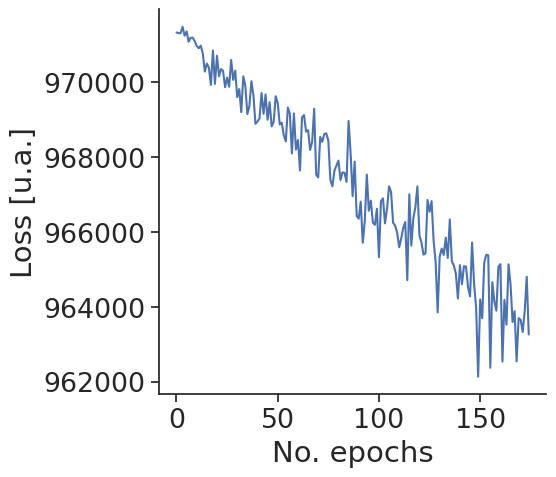

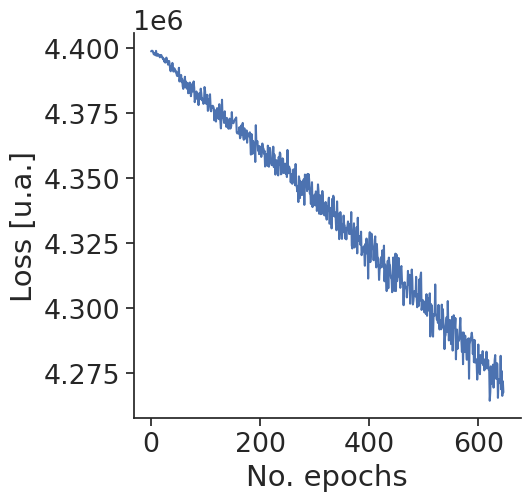

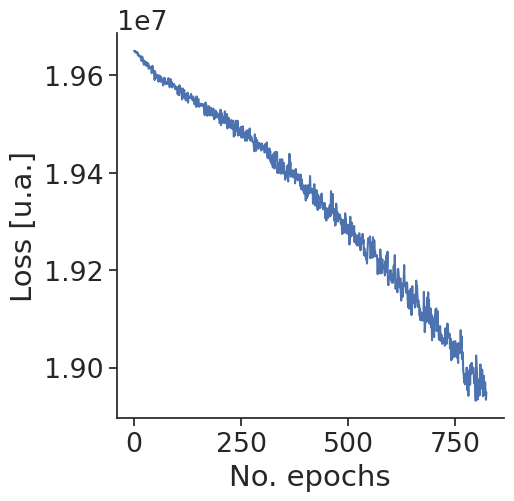

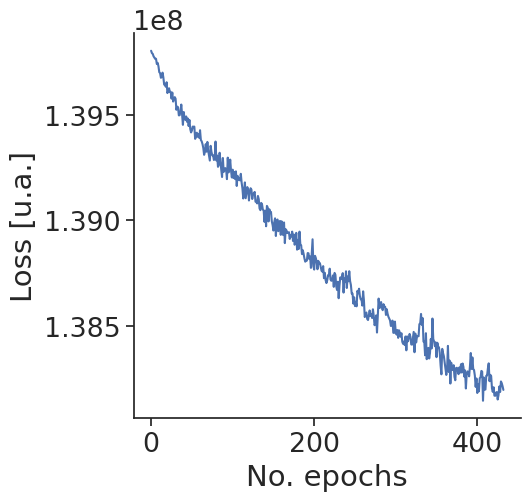

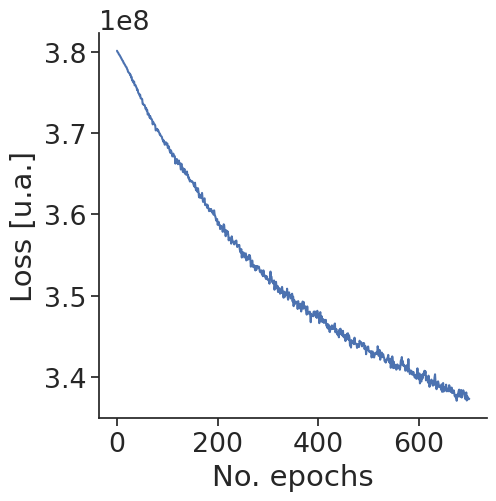

In [8]:
for n in subset:
    deepsurvk.plot_loss(history_dict[str(n)])

### Weak signals

Event rate in train set: 0.747250
Event rate in test set: 0.764500
Survival time distribution:


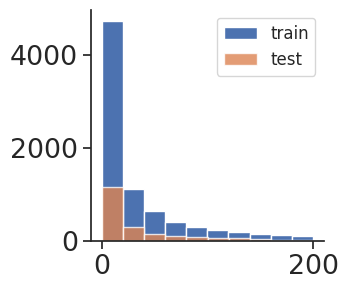

In [9]:
# prepare data
folder = 'linear'
keywords = ['weak', "latest", 'RW']
DATANAME = 'linear-weak'
train_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords)

X_train, Y_train, E_train, = dataframe_to_deepsurv_ds(train_df, is_deepsurvk=True)
X_test, Y_test, E_test = dataframe_to_deepsurv_ds(test_df, is_deepsurvk=True)

print("Event rate in train set: %f" % (sum(E_train==1) / len(E_train)))
print("Event rate in test set: %f" %  (sum(E_test==1)  / len(E_test)))
print('Survival time distribution:')
_, ax = plt.subplots(figsize=(3,3))
ax.hist(train_df['time'], label='train')
ax.hist(test_df['time'], label='test', alpha=0.8)
ax.legend(fontsize=12)
plt.show()

In [10]:
# train DeepSurvK model
dsk = DeepSurvKModel(subset, epochs, train_df, test_df, dataName=DATANAME)
dsk.build_model()
history_dict, dsk_dict, dsk_results = dsk.run_deepsurvModel(
    params=hyperparams,  patience=25,
    tensorboard=False, save_model = False, 
    # early_stopping=False
)
dsk_results

Epoch 1/500
1/1 [==============================] - 1s 660ms/step - loss: 5510.7314
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 5502.9927
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 5518.3726
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 5503.4160
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 5505.3735
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 5495.7573
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 5511.0474
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 5502.8735
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 5511.9985
Epoch 10/500
1/1 [==============================] - 0s 45ms/step - loss: 5508.4927
Epoch 11/500
1/1 [==============================] - 0s 9ms/step - loss: 5500.2798
Epoch 12/500
1/1 [==============================] - 0s 9ms/step - loss: 5512.4502
Epoch 13/500
1/1 

,n train,train time,train score,test score
0,50,6.89,0.604630,0.550999
1,200,5.72,0.680234,0.670049
2,500,12.08,0.690267,0.681520
3,1000,32.97,0.747127,0.725938
4,2000,43.24,0.740748,0.716294
5,5000,102.26,0.771774,0.756300
6,8000,240.96,0.831634,0.816321


In [ ]:
# dsk_results
dsk.write(dsk_results, fileName='model.results.1030.txt')

## Nonlinear

### Quadratic: Interaction between genes

Event rate in train set: 0.751750
Event rate in test set: 0.732500
Survival time distribution:


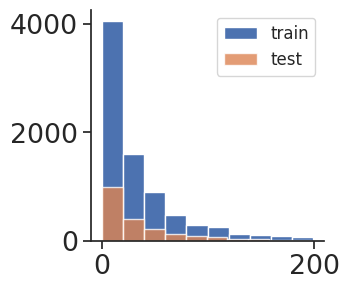

In [11]:
# prepare data
folder = 'nonlinear'
keywords = ['quadratic', "latest", 'RW']
DATANAME = 'nl-quadratic'
train_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords)

X_train, Y_train, E_train, = dataframe_to_deepsurv_ds(train_df, is_deepsurvk=True)
X_test, Y_test, E_test = dataframe_to_deepsurv_ds(test_df, is_deepsurvk=True)

print("Event rate in train set: %f" % (sum(E_train==1) / len(E_train)))
print("Event rate in test set: %f" %  (sum(E_test==1)  / len(E_test)))
print('Survival time distribution:')
_, ax = plt.subplots(figsize=(3,3))
ax.hist(train_df['time'], label='train')
ax.hist(test_df['time'], label='test', alpha=0.8)
ax.legend(fontsize=12)
plt.show()

In [12]:
# train DeepSurvK model
dsk = DeepSurvKModel(subset, epochs, train_df, test_df, dataName=DATANAME)
dsk.build_model()
history_dict, dsk_dict, dsk_results = dsk.run_deepsurvModel(
    params=hyperparams,  patience=25,
    tensorboard=False, save_model = False, 
    # early_stopping=False
)
dsk_results

Epoch 1/500
1/1 [==============================] - 1s 694ms/step - loss: 5689.1973
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 5677.7676
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 5674.3857
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 5683.1323
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 5679.9619
Epoch 6/500
1/1 [==============================] - 0s 16ms/step - loss: 5670.6489
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 5672.2559
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 5682.1362
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 5672.0117
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 5670.7427
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 5664.6191
Epoch 12/500
1/1 [==============================] - 0s 9ms/step - loss: 5644.1270
Epoch 13/500
1/1 [==

,n train,train time,train score,test score
0,50,2.65,0.548419,0.475437
1,200,9.98,0.611288,0.555479
2,500,2.25,0.536395,0.518312
3,1000,41.32,0.606440,0.563786
4,2000,30.86,0.631119,0.600126
5,5000,62.54,0.632728,0.630690
6,8000,280.28,0.731035,0.696943


In [13]:
# dsk_results
dsk.write(dsk_results, fileName='model.results.1030.txt')

## Sine Transformation

Event rate in train set: 0.751125
Event rate in test set: 0.759500
Survival time distribution:


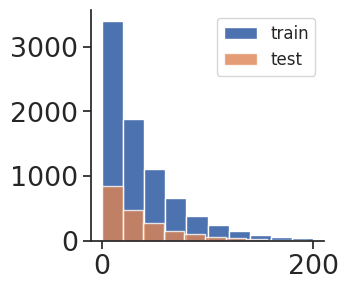

In [14]:
# prepare data
folder = 'nonlinear'
keywords = ['sine', "latest", 'RW']
DATANAME = 'nl-sine'
train_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords)

X_train, Y_train, E_train, = dataframe_to_deepsurv_ds(train_df, is_deepsurvk=True)
X_test, Y_test, E_test = dataframe_to_deepsurv_ds(test_df, is_deepsurvk=True)

print("Event rate in train set: %f" % (sum(E_train==1) / len(E_train)))
print("Event rate in test set: %f" %  (sum(E_test==1)  / len(E_test)))
print('Survival time distribution:')
_, ax = plt.subplots(figsize=(3,3))
ax.hist(train_df['time'], label='train')
ax.hist(test_df['time'], label='test', alpha=0.8)
ax.legend(fontsize=12)
plt.show()

In [15]:
# train DeepSurvK model
dsk = DeepSurvKModel(subset, epochs, train_df, test_df, dataName=DATANAME)
dsk.build_model()
history_dict, dsk_dict, dsk_results = dsk.run_deepsurvModel(
    params=hyperparams,  patience=25,
    tensorboard=False, save_model = False, 
    # early_stopping=False
)
dsk_results

Epoch 1/500
1/1 [==============================] - 1s 995ms/step - loss: 5670.6875
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 5667.1533
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 5673.2788
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 5663.9316
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 5666.3726
Epoch 6/500
1/1 [==============================] - 0s 32ms/step - loss: 5670.8037
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 5664.6489
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 5663.9468
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 5664.2476
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 5667.3945
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 5666.6377
Epoch 12/500
1/1 [==============================] - 0s 45ms/step - loss: 5666.2954
Epoch 13/500
1/1 [==

,n train,train time,train score,test score
0,50,2.34,0.595551,0.492754
1,200,11.22,0.581808,0.471478
2,500,4.17,0.517466,0.538340
3,1000,26.57,0.590044,0.513944
4,2000,72.46,0.593028,0.507778
5,5000,78.14,0.574430,0.545370
6,8000,263.91,0.659566,0.559714


In [16]:
# dsk_results
dsk.write(dsk_results, fileName='model.results.1030.txt')

# Training: Customized params

In [ ]:
n=1000

x = pd.DataFrame(X_train[:n])
y = pd.DataFrame(Y_train[:n])
e = pd.DataFrame(E_train[:n])
# Calculate important parameters.
n_patients_train = x.shape[0]
n_features = x.shape[1]

params = {'epochs':[500],
          'learning_rate':[1e-2, 1e-3, 1e-4],
          'decay':[1e-4],
          'momentum':[0.9]}
best_params = deepsurvk.optimize_hp(x, y, e,
                                    mode='grid', 
                                    n_splits=5, 
                                    verbose=False, 
                                    **params)

print(best_params)

In [14]:
hyperparams = {
    'learning_rate': 1e-5,
    'decay': 1e-4,
    'momentum': 0.5,
    'L2_reg': 15.0,
    # 'batch_norm': True,
    'dropout': 0.4,
    'standardize': True
}
dsk1 = DeepSurvKModel(subset, epochs, train_df, test_df, dataName='exponential-RW')
dsk1.build_model()
history_dict1, dsk_dict1, dsk_results1 = dsk.run_deepsurvModel(
    params=hyperparams,  patience=50, save_model=False
)
dsk1.write(dsk_results1, fileName='model-customized-param-results.txt')

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 5656.6191
Epoch 2/500
1/1 [==============================] - 0s 83ms/step - loss: 5661.3281
Epoch 3/500
1/1 [==============================] - 0s 165ms/step - loss: 5649.0674
Epoch 4/500
1/1 [==============================] - 0s 158ms/step - loss: 5657.9131
Epoch 5/500
1/1 [==============================] - 0s 142ms/step - loss: 5652.4546
Epoch 6/500
1/1 [==============================] - 0s 75ms/step - loss: 5648.4814
Epoch 7/500
1/1 [==============================] - 0s 83ms/step - loss: 5667.1313
Epoch 8/500
1/1 [==============================] - 0s 170ms/step - loss: 5668.9111
Epoch 9/500
1/1 [==============================] - 0s 161ms/step - loss: 5656.3682
Epoch 10/500
1/1 [==============================] - 0s 101ms/step - loss: 5657.1621
Epoch 11/500
1/1 [==============================] - 0s 184ms/step - loss: 5648.0698
Epoch 12/500
1/1 [==============================] - 0s 117ms/step - loss: 5661.9707
Epoch 1

In [15]:
dsk_results1

,n train,train time,train score,test score
0,50,12.68,0.529698,0.467882
1,200,9.06,0.589230,0.592183
2,500,5.90,0.546852,0.540770
3,1000,47.34,0.591554,0.593778
4,2000,9.23,0.578195,0.574406
5,5000,93.56,0.611256,0.612023
6,8000,635.84,0.694664,0.688884


## Archive

In [75]:
data_df = pd.read_csv(os.path.join("data", '2024-08-15', "simulate_survival_10000_2024-08-15.csv"),index_col=0).reset_index(drop=True)

train_ind = pd.read_csv(os.path.join('data', "train_index.csv")).iloc[:,0]
test_ind = pd.read_csv(os.path.join('data', "test_index.csv")).iloc[:,0]

train_df = data_df.iloc[train_ind,:]
test_df = data_df.iloc[test_ind,:]

In [78]:
event_col='status'
time_col='time'
#  Extract the event and time columns as numpy arrays
e_train = train_df[event_col].values.astype(np.int32)
e_test  = test_df[event_col].values.astype(np.int32)

t_train = train_df[time_col].values.astype(np.float32)
t_test =  test_df[time_col].values.astype(np.float32)

# Extract the patient's predictors as a numpy array
x_train = train_df.drop([event_col, time_col], axis = 1).values.astype(np.float32)
x_test  = test_df.drop([event_col, time_col], axis = 1).values.astype(np.float32)

##### Normalization (0-1)
x_train = Normalizer().fit_transform(x_train)
x_test  = Normalizer().fit_transform(x_test)

t_train = Normalizer().fit_transform(t_train.reshape(1,-1)).reshape(-1)
t_test  = Normalizer().fit_transform(t_test.reshape(1,-1)).reshape(-1)

# Sorting
sort_idx = np.argsort(t_train)[::-1]
x_train = x_train[sort_idx]
e_train = e_train[sort_idx]
t_train = t_train[sort_idx]

sort_idx = np.argsort(t_test)[::-1]
x_test = x_test[sort_idx]
e_test = e_test[sort_idx]
t_test = t_test[sort_idx]

# Calculate important parameters.
n_patients_train = x_train.shape[0]
n_features = x_train.shape[1]

In [83]:
# dsk = deepsurvk.DeepSurvK(n_features=n_features, E=E_train)

callbacks = deepsurvk.common_callbacks()

epochs = 1000
history = dsk.fit(x_train, t_train, 
                batch_size=n_patients_train,
                epochs=epochs, 
                callbacks=callbacks,
                shuffle=False)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 364597408.0000
Epoch 2/1000
1/1 [==============================] - 1s 542ms/step - loss: 363981696.0000
Epoch 3/1000
1/1 [==============================] - 0s 231ms/step - loss: 368366016.0000
Epoch 4/1000
1/1 [==============================] - 1s 555ms/step - loss: 363314784.0000
Epoch 5/1000
1/1 [==============================] - 1s 506ms/step - loss: 361336640.0000
Epoch 6/1000
1/1 [==============================] - 0s 236ms/step - loss: 370510144.0000
Epoch 7/1000
1/1 [==============================] - 0s 305ms/step - loss: 363979584.0000
Epoch 8/1000
1/1 [==============================] - 1s 557ms/step - loss: 361206624.0000
Epoch 9/1000
1/1 [==============================] - 0s 238ms/step - loss: 362083488.0000
Epoch 10/1000
1/1 [==============================] - 1s 547ms/step - loss: 359397280.0000
Epoch 11/1000
1/1 [==============================] - 0s 164ms/step - loss: 362265408.0000
Epoch 12/1000
1/1 [===

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='No. epochs', ylabel='Loss [u.a.]'>)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri


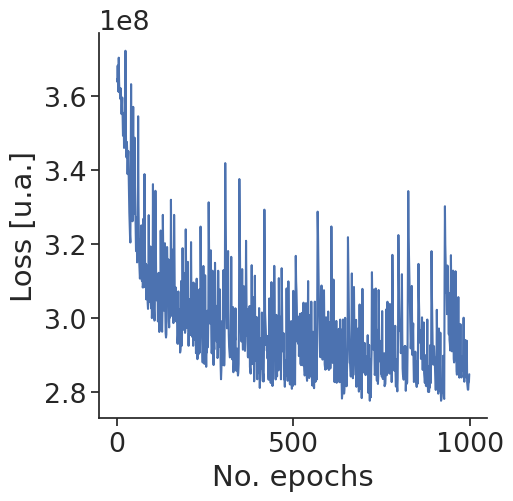

In [84]:
deepsurvk.plot_loss(history)

In [85]:
t_pred_train = np.exp(-dsk.predict(x_train))
c_index_train = deepsurvk.concordance_index(t_train, t_pred_train,e_train)
print(f"c-index of training dataset = {c_index_train}")

t_pred_test = np.exp(-dsk.predict(x_test))
c_index_test = deepsurvk.concordance_index(t_test, t_pred_test,e_test)
print(f"c-index of testing dataset = {c_index_test}")

c-index of training dataset = 0.9582425273069042
c-index of testing dataset = 0.9517607674745969


### set hyperparameters

In [ ]:
hyperparams = {
    'learning_rate': 1e-05,
    'decay': 0.001,
    'momentum': 0.9,
    'L2_reg': 10.0,
    # 'batch_norm': True,
    'dropout': 0.4,
    'standardize': True
}

In [ ]:
# fit model
dsk = deepsurvk.DeepSurvK(n_features=n_features, E=E_train,
                        **hyperparams
                        )
dsk.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 1033)              1068122   
                                                                 
 DroputInput (Dropout)       (None, 1033)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 25)                25850     
                                                                 
 Dropout1 (Dropout)          (None, 25)                0         
                                                                 
 HiddenLayer2 (Dense)        (None, 25)                650       
                                                                 
 Dropout2 (Dropout)          (None, 25)                0         
                                                                 
 OutputLayer (Dense)         (None, 1)                

In [ ]:
callbacks = deepsurvk.common_callbacks()

In [ ]:
%%time
epochs = 1000
history_1 = dsk.fit(X_train, Y_train, 
                  batch_size=n_patients_train,
                  epochs=epochs, 
                  callbacks=callbacks,
                  shuffle=False)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 391338208.0000
Epoch 2/1000
1/1 [==============================] - 0s 312ms/step - loss: 391371392.0000
Epoch 3/1000
1/1 [==============================] - 0s 297ms/step - loss: 391354528.0000
Epoch 4/1000
1/1 [==============================] - 0s 217ms/step - loss: 391372928.0000
Epoch 5/1000
1/1 [==============================] - 0s 298ms/step - loss: 391371392.0000
Epoch 6/1000
1/1 [==============================] - 0s 425ms/step - loss: 391308544.0000
Epoch 7/1000
1/1 [==============================] - 0s 390ms/step - loss: 391298592.0000
Epoch 8/1000
1/1 [==============================] - 0s 266ms/step - loss: 391306208.0000
Epoch 9/1000
1/1 [==============================] - 0s 423ms/step - loss: 391227488.0000
Epoch 10/1000
1/1 [==============================] - 0s 264ms/step - loss: 391261216.0000
Epoch 11/1000
1/1 [==============================] - 0s 302ms/step - loss: 391265792.0000
Epoch 12/1000
1/1 [===

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='No. epochs', ylabel='Loss [u.a.]'>)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri


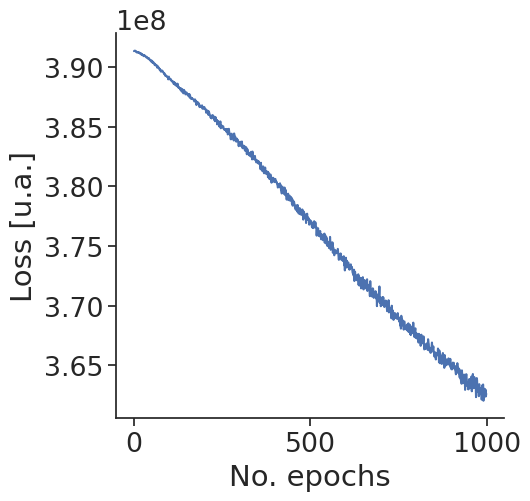

In [ ]:
deepsurvk.plot_loss(history_1)

In [ ]:
Y_pred_train = np.exp(-dsk.predict(X_train))
c_index_train = deepsurvk.concordance_index(Y_train, Y_pred_train, E_train)
print(f"c-index of training dataset = {c_index_train}")

Y_pred_test = np.exp(-dsk.predict(X_test))
c_index_test = deepsurvk.concordance_index(Y_test, Y_pred_test, E_test)
print(f"c-index of testing dataset = {c_index_test}")

c-index of training dataset = 0.8483699870952472
c-index of testing dataset = 0.844152863460755
